In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import cv2

In [2]:
import cv2
from sklearn.model_selection import train_test_split
import random

imageSize = 80

def loadImages(directory, test_size=0.2, random_state=42, max_images_per_label=12000):
    data = []
    labels = os.listdir(directory)
    for label in labels:
        folder = os.listdir(os.path.join(directory, label))
        image_count = 0  # Counter for the number of images per label
        for file in folder:
            if image_count >= max_images_per_label:
                break
            img_path = os.path.join(directory, label, file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (imageSize, imageSize))
                # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = img / 255.0
                data.append([label, img])
                image_count += 1
            else:
                print(f"Failed to read image: {file}", label, image_count, " images loaded")

    # Shuffle the data indices
    indices = list(range(len(data)))
    random.shuffle(indices)

    # Use shuffled indices to access shuffled data
    shuffled_data = [data[i] for i in indices]

    # Splitting the data into training and test sets
    labels, images = zip(*shuffled_data)
    X_train, X_test, y_train, y_test = train_test_split(
        images, labels, test_size=test_size, random_state=random_state
    )

    return np.array(X_train), np.array(X_test), y_train, y_test

X_train, X_test, y_train, y_test = loadImages('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages')

Failed to read image: 6059.jpg Dog 227  images loaded
Failed to read image: 11849.jpg Dog 235  images loaded
Failed to read image: 3288.jpg Dog 1325  images loaded
Failed to read image: 6238.jpg Dog 1345  images loaded


Corrupt JPEG data: 226 extraneous bytes before marker 0xd9


Failed to read image: 2688.jpg Dog 1778  images loaded


Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


Failed to read image: 7112.jpg Dog 2989  images loaded
Failed to read image: 8730.jpg Dog 3140  images loaded
Failed to read image: 11702.jpg Dog 3382  images loaded
Failed to read image: 7133.jpg Dog 3766  images loaded


Failed to read image: 11853.jpg Dog 4255  images loaded
Failed to read image: 7969.jpg Dog 5072  images loaded
Failed to read image: 7459.jpg Dog 5452  images loaded
Failed to read image: 10747.jpg Dog 5742  images loaded


Corrupt JPEG data: 254 extraneous bytes before marker 0xd9


Failed to read image: 6718.jpg Dog 6345  images loaded
Failed to read image: 2877.jpg Dog 6440  images loaded
Failed to read image: 3136.jpg Dog 6556  images loaded


Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9


Failed to read image: 11675.jpg Dog 7621  images loaded
Failed to read image: 4367.jpg Dog 8038  images loaded
Failed to read image: Thumbs.db Dog 8228  images loaded
Failed to read image: 5604.jpg Dog 8230  images loaded
Failed to read image: 9188.jpg Dog 8725  images loaded
Failed to read image: 3588.jpg Dog 9132  images loaded
Failed to read image: 11410.jpg Dog 9333  images loaded
Failed to read image: 1308.jpg Dog 9471  images loaded
Failed to read image: 10158.jpg Dog 9751  images loaded
Failed to read image: 2384.jpg Dog 10177  images loaded


Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


Failed to read image: 1866.jpg Dog 11468  images loaded
Failed to read image: 7369.jpg Dog 11617  images loaded
Failed to read image: 10797.jpg Dog 11720  images loaded
Failed to read image: 10401.jpg Dog 11880  images loaded


Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


Failed to read image: 4833.jpg Cat 818  images loaded
Failed to read image: 850.jpg Cat 938  images loaded
Failed to read image: 8470.jpg Cat 1296  images loaded


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


Failed to read image: 11210.jpg Cat 2746  images loaded
Failed to read image: 660.jpg Cat 3377  images loaded
Failed to read image: 140.jpg Cat 3972  images loaded
Failed to read image: 10820.jpg Cat 4086  images loaded
Failed to read image: 10501.jpg Cat 4801  images loaded
Failed to read image: 9171.jpg Cat 5274  images loaded


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


Failed to read image: 9778.jpg Cat 5486  images loaded


Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


Failed to read image: 2663.jpg Cat 6661  images loaded
Failed to read image: 11935.jpg Cat 7662  images loaded
Failed to read image: 10125.jpg Cat 8141  images loaded
Failed to read image: 11874.jpg Cat 8221  images loaded
Failed to read image: 936.jpg Cat 8229  images loaded
Failed to read image: Thumbs.db Cat 8231  images loaded
Failed to read image: 5553.jpg Cat 8271  images loaded
Failed to read image: 7978.jpg Cat 8522  images loaded
Failed to read image: 3491.jpg Cat 8600  images loaded
Failed to read image: 3300.jpg Cat 8748  images loaded


Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


Failed to read image: 666.jpg Cat 9779  images loaded
Failed to read image: 7968.jpg Cat 9996  images loaded
Failed to read image: 11565.jpg Cat 10301  images loaded
Failed to read image: 10404.jpg Cat 10384  images loaded
Failed to read image: 9565.jpg Cat 11350  images loaded


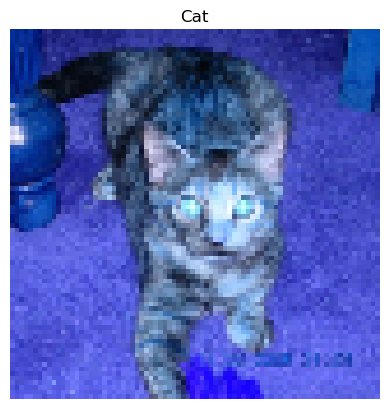

In [3]:
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into X_train, X_test, y_train, y_test

# Print the first image from the training dataset
plt.imshow(X_train[1])
plt.title(y_train[1])
plt.axis('off')
plt.show()

In [4]:
!pip install --upgrade tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 73.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.31.0
    Uninstalling tensorflow-io-gcs-filesystem-0.31.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.31.0
  Attempting uninstall: tensorflow-io
    Found existing installation: tensorflow-io 0.31.0
    Uninstalling tensorflow-io-0.31.0:
      Successfully uninstalled tensorflow-io-0.31.0


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.optimizers import SGD

def create_model(input_shape, num_classes):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=(imageSize,imageSize,3), padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model.add(Dropout(0.5))
    model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    return model

input_shape = (imageSize, imageSize, 3)
num_classes = 2

model = create_model(input_shape, num_classes)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [6]:
def replace_labels_with_numbers(labels):
    replaced_labels = []
    for label in labels:
        if label.lower() == 'dog':
            replaced_labels.append(1)
        elif label.lower() == 'cat':
            replaced_labels.append(0)
        else:
            replaced_labels.append(label)
    return replaced_labels
y_train_encoded = np.array(replace_labels_with_numbers(y_train))
y_test_encoded = np.array(replace_labels_with_numbers(y_test))


In [7]:
# Assuming you have one-hot encoded labels (y_train_encoded, y_test_encoded)
history = model.fit(X_train, y_train_encoded, batch_size=20, epochs=10, validation_split=0.1)

Epoch 1/10
864/864 [==============================] - 17s 7ms/step - loss: 0.6546 - accuracy: 0.6096 - val_loss: 0.5964 - val_accuracy: 0.6755
Epoch 2/10
864/864 [==============================] - 6s 7ms/step - loss: 0.5742 - accuracy: 0.7007 - val_loss: 0.5181 - val_accuracy: 0.7391
Epoch 3/10
864/864 [==============================] - 5s 6ms/step - loss: 0.5124 - accuracy: 0.7480 - val_loss: 0.4978 - val_accuracy: 0.7677
Epoch 4/10
864/864 [==============================] - 5s 6ms/step - loss: 0.4588 - accuracy: 0.7830 - val_loss: 0.4686 - val_accuracy: 0.7833
Epoch 5/10
864/864 [==============================] - 5s 6ms/step - loss: 0.4108 - accuracy: 0.8158 - val_loss: 0.3922 - val_accuracy: 0.8250
Epoch 6/10
864/864 [==============================] - 5s 6ms/step - loss: 0.3692 - accuracy: 0.8347 - val_loss: 0.3576 - val_accuracy: 0.8349
Epoch 7/10
864/864 [==============================] - 5s 6ms/step - loss: 0.3358 - accuracy: 0.8544 - val_loss: 0.3501 - val_accuracy: 0.8365
Epoch

In [8]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

150/150 [==============================] - 1s 4ms/step - loss: 0.2982 - accuracy: 0.8708
Test Loss: 0.29820430278778076
Test Accuracy: 0.8708333373069763


1/1 [==============================] - 0s 187ms/step
Predicted label: cat
Certainty:  [[0.9994552]] %


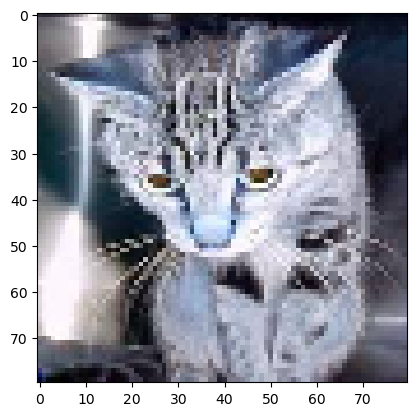

In [9]:
img_path = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/10016.jpg"
img = cv2.imread(img_path)
imageSize = 80
img = cv2.resize(img, (imageSize, imageSize))
img = img / 255.0
plt.imshow(img)
# Assuming you have a trained model named 'model'
img = img.astype(np.float32)
output = model.predict(np.expand_dims(img, axis=0))
if output > 0.5:
    predicted_label = "dog"
    certainty = output
else:
    predicted_label = "cat"
    certainty = 1-output

print("Predicted label:", predicted_label)
print("Certainty: ", certainty, "%")
